# 1. Importing the Libraries

In [195]:
import numpy as np
import streamlit as st 
from PIL import Image 
%pip install visualkeras
from tensorflow.keras.models import load_model
import visualkeras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.image as mpimg
import pickle
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing import image
import matplotlib.cm as cm
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D  
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os, shutil
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting 
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


# 2. Dataset Information : ( Train, Test & Validation Set )

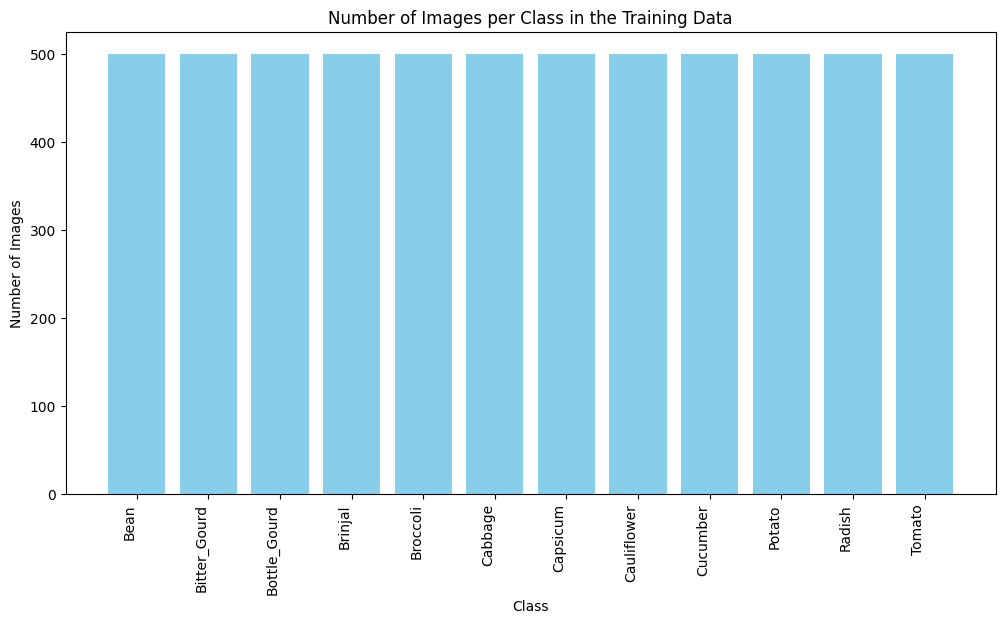

In [14]:
train_vis_dir = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train'

# Get the list of all subdirectories (classes)
classes = os.listdir(train_vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(train_vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Training Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

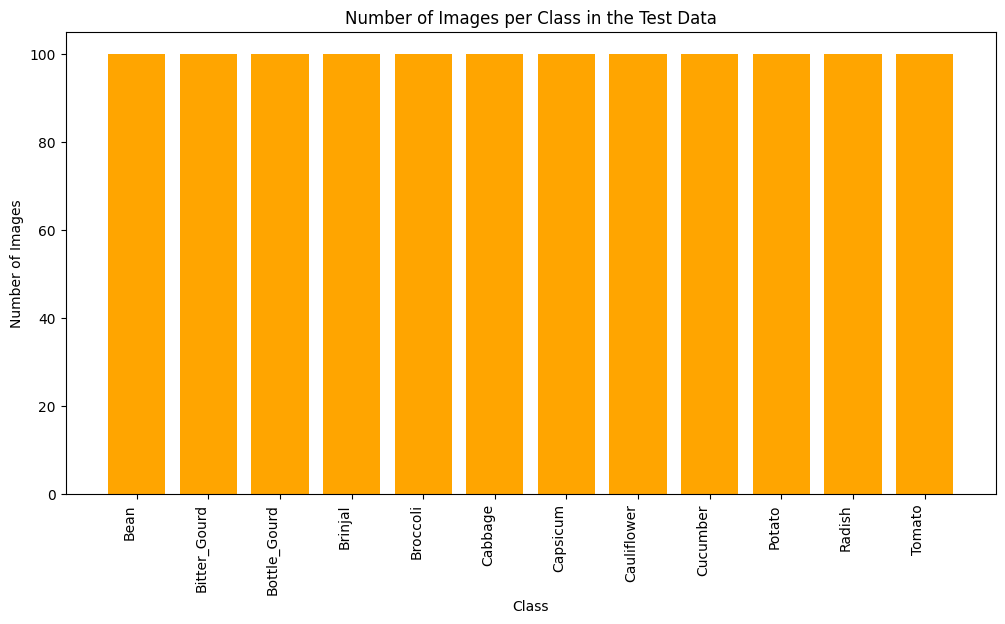

In [15]:
test_vis_dir = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/test'

# Get the list of all subdirectories (classes)
classes = os.listdir(test_vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(test_vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='orange')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Test Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

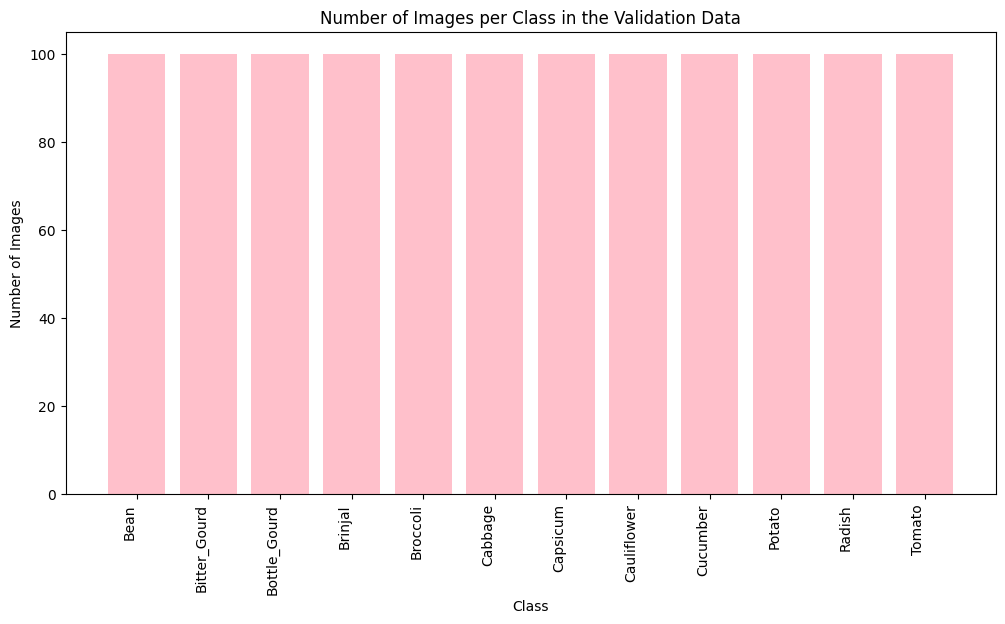

In [16]:
val_vis_dir = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/validation'

# Get the list of all subdirectories (classes)
classes = os.listdir(val_vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(val_vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='pink')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Validation Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

# 3. Data Visualization

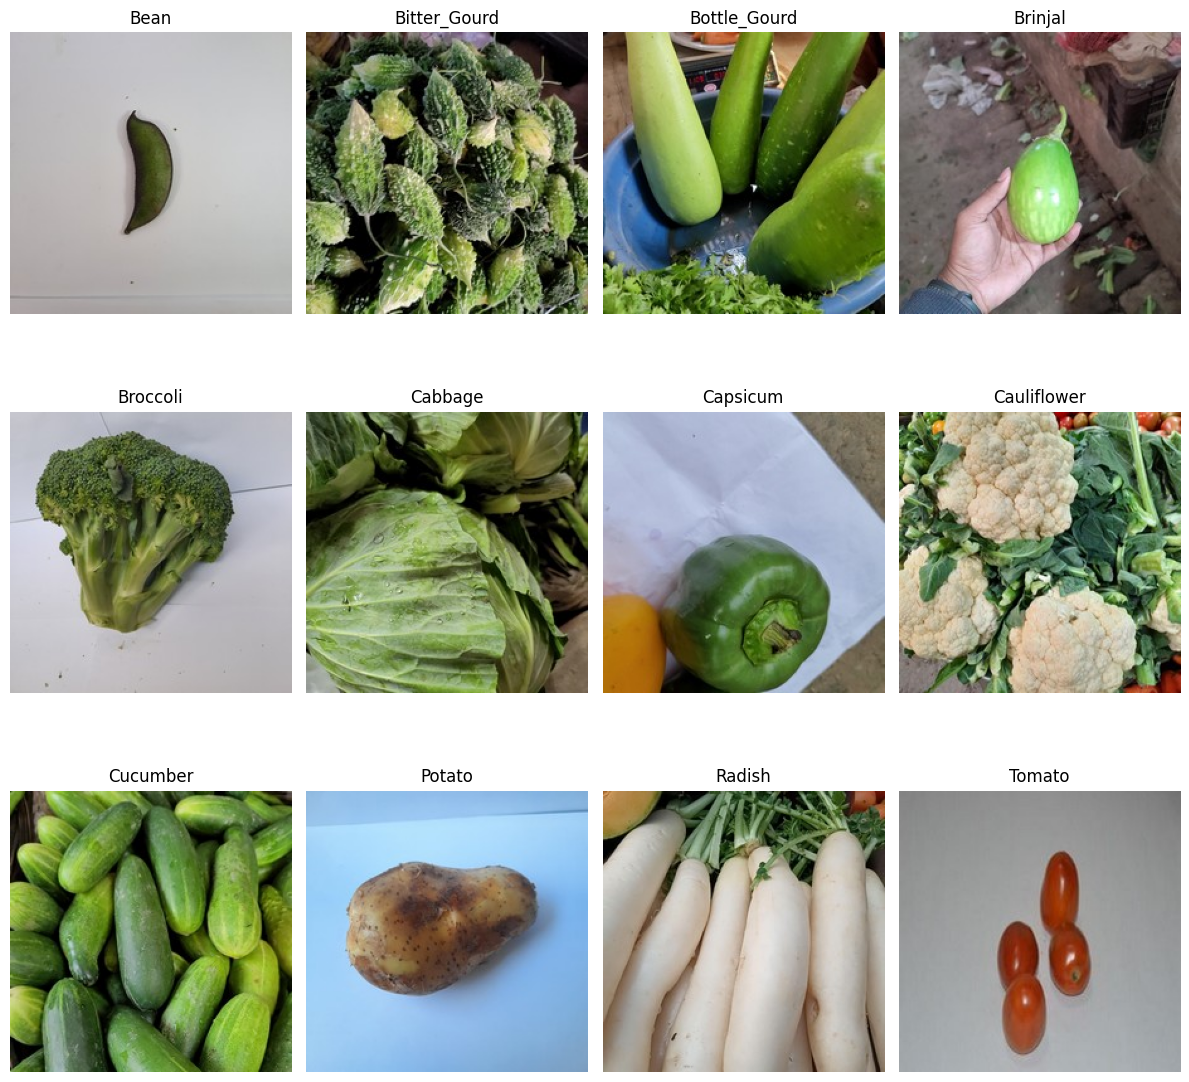

In [17]:
# Let's plot a few images
test_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/test'
train_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train'
validation_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/validation'

image_categories = os.listdir(train_path)

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories[:15]):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(3, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_images(image_categories)     

# Resizing Images 

    3.1 Resizing Images to 150x150 Pixels

In [18]:
# Define paths
input_dirs = {
    'train': 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train',
    'test': 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/test',
    'validation': 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/validation'
}
output_dir = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Save_Model'

# Create output directory and subdirectories if they don't exist
for subset in input_dirs.keys():
    subset_dir = os.path.join(output_dir, subset)
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)

def resize_and_save_image(input_path, output_path, size=(150, 150)):
    try:
        with Image.open(input_path) as img:
            # Handle images with Transparency in Palette mode
            if img.mode == 'P':
                img = img.convert('RGBA')
            # Convert image to RGB if it has an alpha channel or is Palette based
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            img = img.resize(size, Image.LANCZOS)
            img.save(output_path, format='JPEG')
    except Exception as e:  
        print(f"Error processing {input_path}: {e}")

def process_directory(input_directory, output_directory):
    for root, dirs, files in os.walk(input_directory):
        # Create the corresponding directory structure in the output directory
        relative_path = os.path.relpath(root, input_directory)
        output_path = os.path.join(output_directory, relative_path)
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        
        # Process each image file
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_file_path = os.path.join(root, file_name)
                output_file_path = os.path.join(output_path, file_name)
                resize_and_save_image(input_file_path, output_file_path)

# Process each directory separately
for subset, dir_path in input_dirs.items():
    process_directory(dir_path, os.path.join(output_dir, subset))

print("Resizing and saving images completed.")

Resizing and saving images completed.


    3.2 Resized Images Visualization

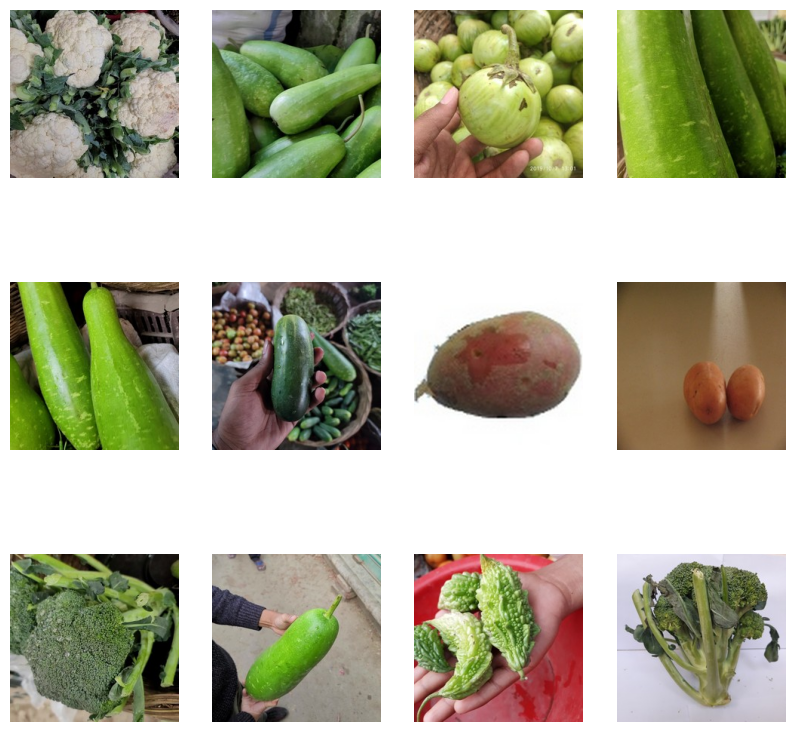

In [21]:
# Define the path to your test directory without a trailing comma
vis_dir = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train'

# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(vis_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 12)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(3, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

# 4. Data Generators

In [23]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            seed=777,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            seed=777,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            seed=777,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')

Found 6000 images belonging to 12 classes.
Found 1200 images belonging to 12 classes.
Found 1200 images belonging to 12 classes.


# Data Augumentation for Diversity (If Necessary)

In [25]:
# Why Data Augmentation ? : It is a powerful technique used in machine learning to artificially increase the size 
# and diversity of a training dataset. It introduces the variations in the training data, forcing the model 
# to learn more robust and generalizable features.

# data_augmentation = ImageDataGenerator(
#     rescale=1.0/255.0,
#     rotation_range=40,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     shear_range=0.2,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

# Verify the training path exists
# train_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train'
# if not os.path.exists(train_path):
#     print(f"Path does not exist: {train_path}")

# Load training data using flow_from_directory
# train_gen = data_augmentation.flow_from_directory(
#     train_path,
#     target_size=(150, 150),
#     batch_size=64,
#     class_mode='categorical'
# )

# Get one batch of images
# images, labels = next(train_gen)

# Choose one image to apply augmentations
# if images.shape[0] > 0:
#     single_image = images[0]
# else:
#     print("No images found in the batch.")

# Visualize the original image to ensure it loads correctly
# plt.figure(figsize=(5, 5))
# plt.imshow(single_image)
# plt.title("Original Image")
# plt.axis('off')
# plt.show()

# Visualize some augmented versions of the single image
# plt.figure(figsize=(10, 10))

# plt.title("Augmented Image")
# for i in range(9):
#     augmented_image = data_augmentation.random_transform(single_image)
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_image)
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

# Pre-trained Model for Fine-tuning (If necessary)

In [26]:
# Why Pre-trained Model ? : is a machine learning model that has already been trained on a massive dataset and can be
# fine-tuned for a specific task. It improves the accuracy, enhanced generalization, accessibility, reduce time 
# and resource efficiency. It has popular pre-trained models :
 
# 1. NLP (Natural Language Processing) : such as GPT (Generative Pre-trained Transformer)
# 2. CV (Computer Vision) : such as ResNet (Residual Neural Network) , VGG16 (Visual Geometry Group Network)
# Inception : A Deep Learning Architecture for Image Recognition
# 3. Speech Recognition : Wav2Vec 2.0 (Unsupervised Pre-training for Speech Recognition)

#  conv_base = VGG16(
#     weights ='imagenet',
#     include_top = False,
#     input_shape = (150,150,3)
# )

In [27]:
# conv_base.trainable = True

# set_trainable = False

# for layer in conv_base.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

# for layer in conv_base.layers:
#     print(layer.name,layer.trainable)

# conv_base.summary()

# 5. CNN Model Creation

In [28]:
# Build your model on top of the pre-trained VGG16
# model = Sequential()

# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(256,activation='relu')),  
# model.add(Dense(12, activation='softmax')), 

# Print the model summary 
# model.summary()

# Create a more complex CNN model with padding adjustments
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Second convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Fourth convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Fifth convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.2),


    # Flattening the 3D output to 1D
    layers.Flatten(),

    # Fully connected (Dense) layer
    layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Output layer with softmax activation for classification
    layers.Dense(12, activation='softmax')
])
    
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 636,204 (2.43 MB)

 Trainable params: 634,092 (2.42 MB)

 Non-trainable params: 2,112 (8.25 KB)

# 6. Save the Model

In [29]:
model.save('Vegetables_Recog_Model.h5')

# 7. Compile the Model

In [34]:
# Set up the optimizer with the specified learning rate 
optimizer = AdamW(learning_rate=0.0001)

# Compile the model with the specified optimizer and loss function 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 8. Model Training & Saving

In [36]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Save_Model/my_model.keras',  # Path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine the best model ('max' for validation accuracy)
    verbose=1  # Verbosity mode
)

# Train the model
history = model.fit(
    train_image_generator,
    epochs=25,
    validation_data=test_image_generator,
    verbose=2,
    callbacks=[checkpoint_callback]  # Include the callback
)

# Save the training history for later visualization
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/25

Epoch 1: val_accuracy improved from -inf to 0.08250, saving model to C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Save_Model/my_model.keras
94/94 - 742s - 8s/step - accuracy: 0.2740 - loss: 8.5553 - val_accuracy: 0.0825 - val_loss: 8.6453
Epoch 2/25

Epoch 2: val_accuracy improved from 0.08250 to 0.08333, saving model to C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Save_Model/my_model.keras
94/94 - 737s - 8s/step - accuracy: 0.5472 - loss: 7.3898 - val_accuracy: 0.0833 - val_loss: 8.5199
Epoch 3/25

Epoch 3: val_accuracy improved from 0.08333 to 0.15583, saving model to C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Save_Model/my_model.keras
94/94 - 633s - 7s/step - accuracy: 0.6810 - loss: 6.8065 - val_accuracy: 0.1558 - val_loss: 8.4663
Epoch 4/25

Epoch 4: val_accuracy improved from 0.15583 to 0.22000, saving model to C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Save_Model/my_model.keras
94/94 

# 9. CNN Model Visualization 

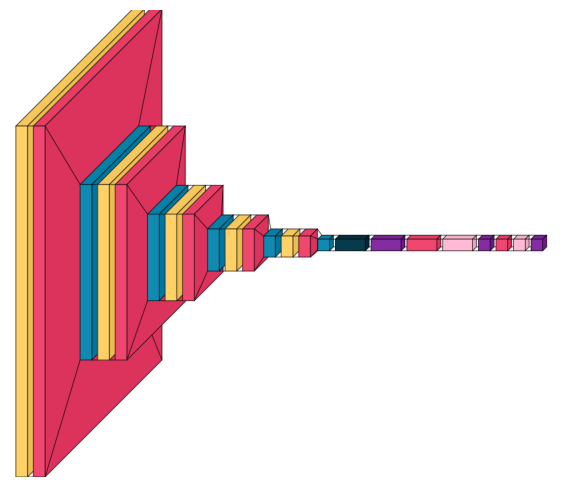

In [ ]:
# Load your pre-trained model
model_path = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Save_Model/my_model.keras'
model = load_model(model_path)

# Visualize the model architecture with visualkeras
# Save the visualization as an image file
visualization_path = 'C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\CNN Visualization.png'
visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(7, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# 10. Training Results
    10.1 Training Loss & Accuracy Graph

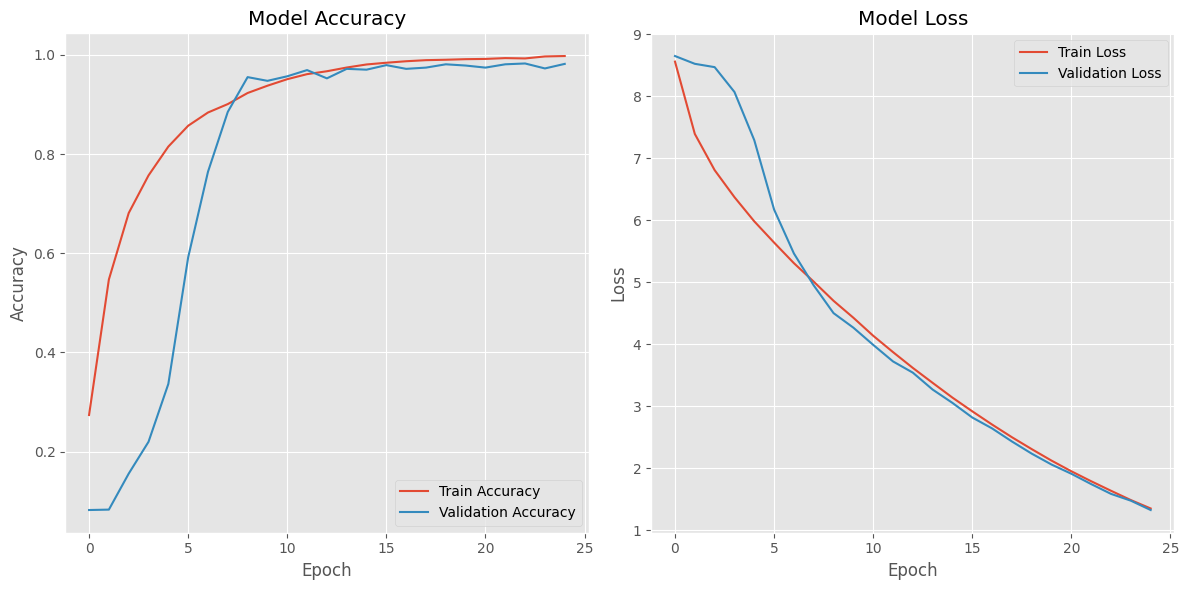

In [65]:
# Load the training history
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

    10.2 Model Confusion Matrix & Classification Report

In [184]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Reset the test generator to start from the first batch
train_image_generator.reset()

# Iterate through the test generator
for i in range(len(train_image_generator)):
    # Get the input data (x) and true labels (y)
    x, y = train_image_generator[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in train_image_generator.class_indices.items()}

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 868ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 896ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 937ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 696ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 496ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 954ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

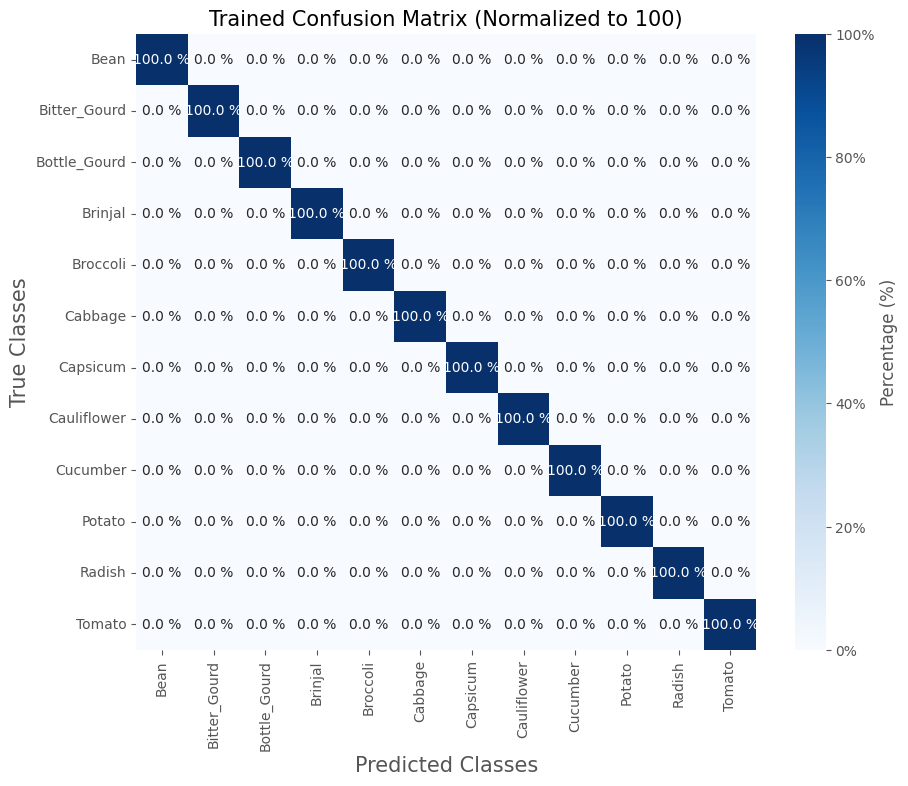

Classification Report:
              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00       500
Bitter_Gourd       1.00      1.00      1.00       500
Bottle_Gourd       1.00      1.00      1.00       500
     Brinjal       1.00      1.00      1.00       500
    Broccoli       1.00      1.00      1.00       500
     Cabbage       1.00      1.00      1.00       500
    Capsicum       1.00      1.00      1.00       500
 Cauliflower       1.00      1.00      1.00       500
    Cucumber       1.00      1.00      1.00       500
      Potato       1.00      1.00      1.00       500
      Radish       1.00      1.00      1.00       500
      Tomato       1.00      1.00      1.00       500

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [188]:
# Create and normalize confusion matrix
conf_matrix_normalized = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized,
                 annot=True, fmt='.1f', cmap="Blues", vmin=0, vmax=100,
                 cbar_kws={'label': 'Percentage (%)', 'ticks': [0, 20, 40, 60, 80, 100]},
                 xticklabels=[label_names[x] for x in sorted(set(labels))],
                 yticklabels=[label_names[x] for x in sorted(set(labels))],
                 mask=None)  # No mask needed for full matrix annotation

# Adding percentage symbol to all annotations
for text in plt.gca().texts:
    text.set_text(text.get_text() + " %")

# Set color bar limits and labels
color_bar = ax.collections[0].colorbar
color_bar.set_ticks([0, 20, 40, 60, 80, 100])
color_bar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

plt.xlabel("Predicted Classes", fontsize=15)
plt.ylabel("True Classes", fontsize=15)
plt.title('Trained Confusion Matrix (Normalized to 100)', fontsize=15)
plt.show()

# Assuming `predictions` and `labels` have already been populated
# Convert numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in train_image_generator.class_indices.items()}

# Generate classification report
class_report = classification_report(labels, predictions, target_names=[label_names[i] for i in sorted(label_names.keys())])

print("Classification Report:")
print(class_report)

In [189]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Reset the test generator to start from the first batch
test_image_generator.reset()

# Iterate through the test generator
for i in range(len(test_image_generator)):
    # Get the input data (x) and true labels (y)
    x, y = test_image_generator[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_image_generator.class_indices.items()}

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 642ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


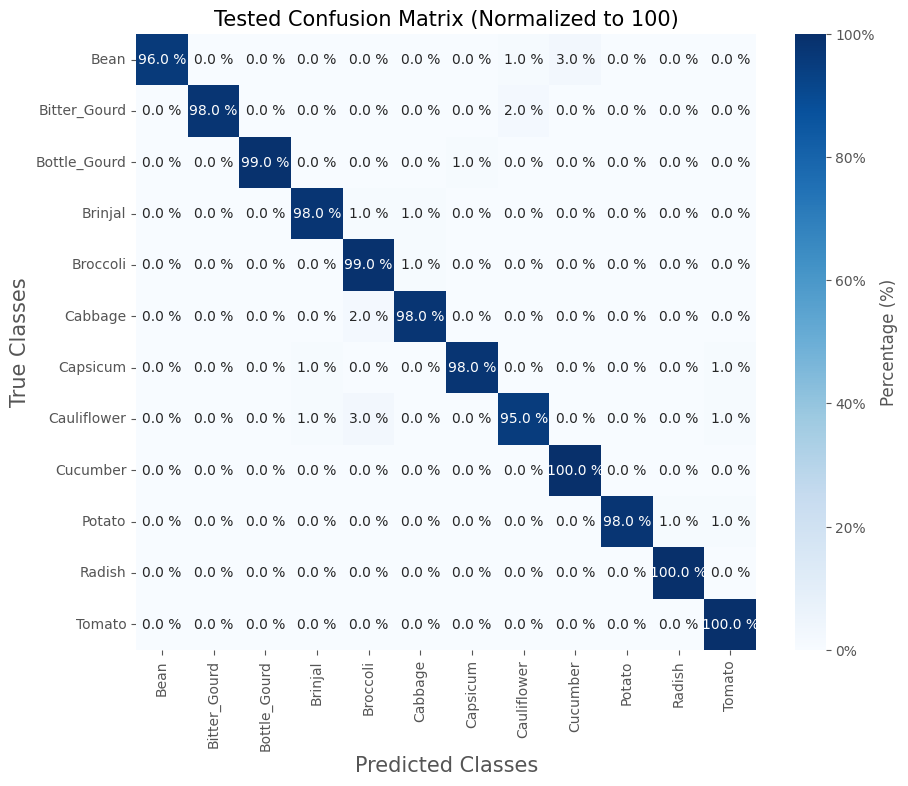

Classification Report:
              precision    recall  f1-score   support

        Bean       1.00      0.96      0.98       100
Bitter_Gourd       1.00      0.98      0.99       100
Bottle_Gourd       1.00      0.99      0.99       100
     Brinjal       0.98      0.98      0.98       100
    Broccoli       0.94      0.99      0.97       100
     Cabbage       0.98      0.98      0.98       100
    Capsicum       0.99      0.98      0.98       100
 Cauliflower       0.97      0.95      0.96       100
    Cucumber       0.97      1.00      0.99       100
      Potato       1.00      0.98      0.99       100
      Radish       0.99      1.00      1.00       100
      Tomato       0.97      1.00      0.99       100

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



In [190]:
# Create and normalize confusion matrix
conf_matrix_normalized = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized,
                 annot=True, fmt='.1f', cmap="Blues", vmin=0, vmax=100,
                 cbar_kws={'label': 'Percentage (%)', 'ticks': [0, 20, 40, 60, 80, 100]},
                 xticklabels=[label_names[x] for x in sorted(set(labels))],
                 yticklabels=[label_names[x] for x in sorted(set(labels))],
                 mask=None)  # No mask needed for full matrix annotation

# Adding percentage symbol to all annotations
for text in plt.gca().texts:
    text.set_text(text.get_text() + " %")

# Set color bar limits and labels
color_bar = ax.collections[0].colorbar
color_bar.set_ticks([0, 20, 40, 60, 80, 100])
color_bar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

plt.xlabel("Predicted Classes", fontsize=15)
plt.ylabel("True Classes", fontsize=15)
plt.title('Tested Confusion Matrix (Normalized to 100)', fontsize=15)
plt.show()

# Assuming `predictions` and `labels` have already been populated
# Convert numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_image_generator.class_indices.items()}

# Generate classification report
class_report = classification_report(labels, predictions, target_names=[label_names[i] for i in sorted(label_names.keys())])

print("Classification Report:")
print(class_report)

In [191]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Reset the test generator to start from the first batch
val_image_generator.reset()

# Iterate through the test generator
for i in range(len(val_image_generator)):
    # Get the input data (x) and true labels (y)
    x, y = val_image_generator[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in val_image_generator.class_indices.items()}

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 492ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 495ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 486ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 489ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 486ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 498ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 489ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 494ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 489ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 488ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 489ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


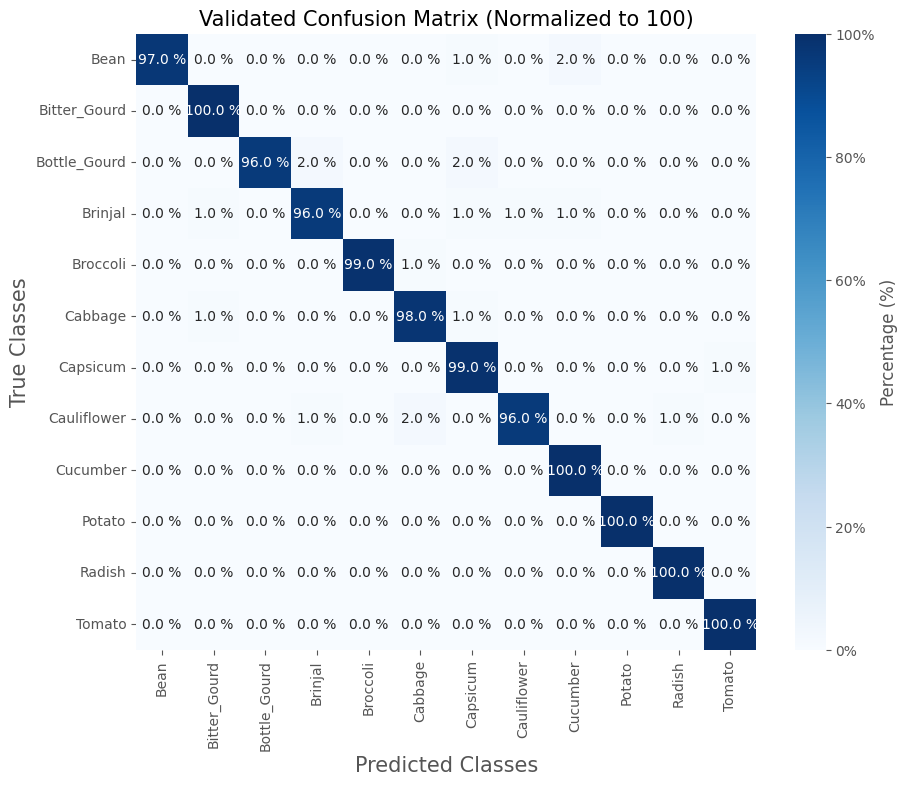

Classification Report:
              precision    recall  f1-score   support

        Bean       1.00      0.97      0.98       100
Bitter_Gourd       0.98      1.00      0.99       100
Bottle_Gourd       1.00      0.96      0.98       100
     Brinjal       0.97      0.96      0.96       100
    Broccoli       1.00      0.99      0.99       100
     Cabbage       0.97      0.98      0.98       100
    Capsicum       0.95      0.99      0.97       100
 Cauliflower       0.99      0.96      0.97       100
    Cucumber       0.97      1.00      0.99       100
      Potato       1.00      1.00      1.00       100
      Radish       0.99      1.00      1.00       100
      Tomato       0.99      1.00      1.00       100

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



In [192]:
# Create and normalize confusion matrix
conf_matrix_normalized = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized,
                 annot=True, fmt='.1f', cmap="Blues", vmin=0, vmax=100,
                 cbar_kws={'label': 'Percentage (%)', 'ticks': [0, 20, 40, 60, 80, 100]},
                 xticklabels=[label_names[x] for x in sorted(set(labels))],
                 yticklabels=[label_names[x] for x in sorted(set(labels))],
                 mask=None)  # No mask needed for full matrix annotation

# Adding percentage symbol to all annotations
for text in plt.gca().texts:
    text.set_text(text.get_text() + " %")

# Set color bar limits and labels
color_bar = ax.collections[0].colorbar
color_bar.set_ticks([0, 20, 40, 60, 80, 100])
color_bar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

plt.xlabel("Predicted Classes", fontsize=15)
plt.ylabel("True Classes", fontsize=15)
plt.title('Validated Confusion Matrix (Normalized to 100)', fontsize=15)
plt.show()

# Assuming `predictions` and `labels` have already been populated
# Convert numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in val_image_generator.class_indices.items()}

# Generate classification report
class_report = classification_report(labels, predictions, target_names=[label_names[i] for i in sorted(label_names.keys())])

print("Classification Report:")
print(class_report)

# 11. Accuracy vs Loss for the train, test & validate set

In [147]:
model.evaluate(train_image_generator)
model.evaluate(test_image_generator)
model.evaluate(val_image_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 1.0000 - loss: 1.5263
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 965ms/step - accuracy: 0.9852 - loss: 1.5791
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9891 - loss: 1.5720


[1.5848842859268188, 0.98416668176651]

# 12. Testing the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


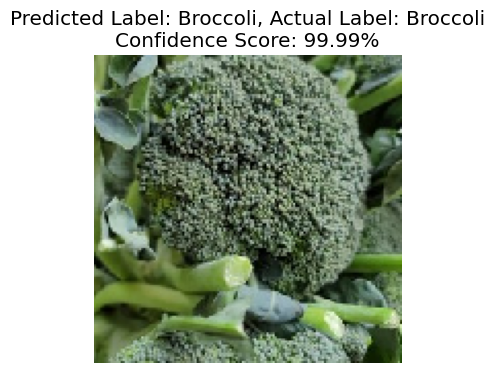

In [161]:
test_image_path = 'C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\Vegetables_Images\\test\\Broccoli\\1018.jpg'

# Define the function to generate predictions and plot the image
def generate_predictions(test_image_path, actual_label):
    # Load and preprocess the image
    test_img = load_img(test_image_path, target_size=(150, 150))  # Adjust target size
    test_img_arr = img_to_array(test_img) / 255.0
    test_img_input = np.expand_dims(test_img_arr, axis=0)

    # Make Predictions
    predictions = model.predict(test_img_input)
    predicted_label = np.argmax(predictions)
    predicted_vegetable = class_map[predicted_label]
    prediction_score = np.max(predictions) * 100

    # Display the image with the predicted and actual labels
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title(f"Predicted Label: {predicted_vegetable}, Actual Label: {actual_label}\nConfidence Score: {prediction_score:.2f}%")
    plt.grid(False)
    plt.axis('off')
    plt.show()

# Call the function
generate_predictions(test_image_path, actual_label='Broccoli')

# 13. Generating Predictions for External Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


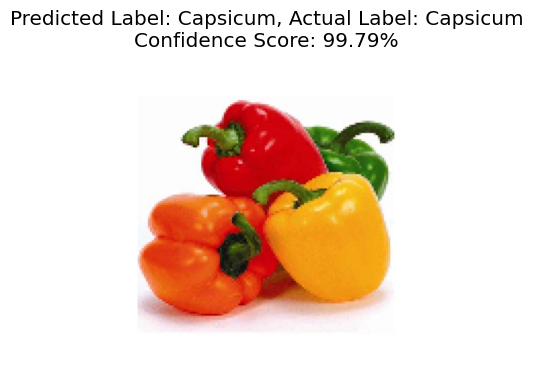

In [74]:
external_image_path_1 = "C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\External_Images\\Capsicum.jpg"
generate_predictions(external_image_path_1, actual_label='Capsicum')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


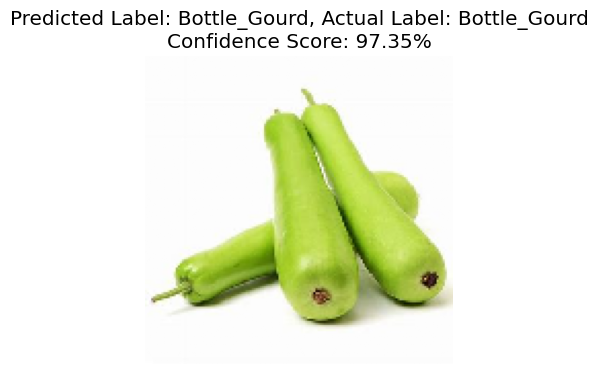

In [135]:
# Generate predictions for external image
external_image_path_2 = "C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\External_Images\\Bottle_Gourd.jpg"
generate_predictions(external_image_path_2, actual_label='Bottle_Gourd')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


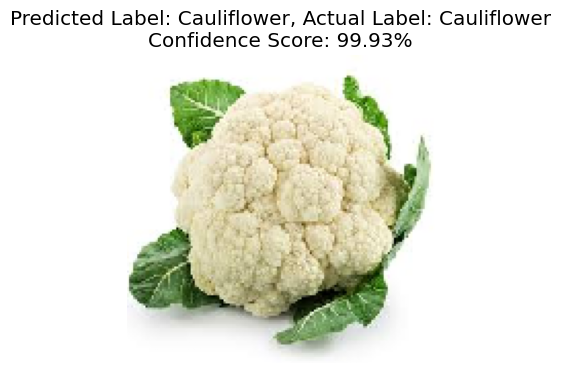

In [197]:
# Generate predictions for external image
external_image_path_2 = "C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\External_Images\\Cauliflower.jpg"
generate_predictions(external_image_path_2, actual_label='Cauliflower')

# 14. Testing On Validation Data
    14.1 Predictions On Validation Images

In [153]:
# Load the trained model
model = tf.keras.models.load_model('C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\Save_Model\\my_model.keras')

# Define paths to the images
image_paths = [
    'C:\\Users\\lenovo\Downloads\\Vegetable_Classification_And_Detection\\Vegetables_Images\\validation\\Cauliflower\\1254.jpg',
    'C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\Vegetables_Images\\validation\\Bottle_Gourd\\1219.jpg',
    'C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\Vegetables_Images\\validation\\Capsicum\\1206.jpg',
]

# Define a function to get the true label from the image path
def get_true_label(img_path):
    return os.path.basename(os.path.dirname(img_path))

# Load and preprocess the images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image to 128x128
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale pixel values to [0, 1]
    return img_array

# Predict and get true labels
predictions = []
true_labels = []

for img_path in image_paths:
    img_array = load_and_preprocess_image(img_path)
    pred_prob = model.predict(img_array)
    pred_class = np.argmax(pred_prob, axis=1)[0]  # Get the predicted class index
    predictions.append(pred_class)
    true_labels.append(get_true_label(img_path))  # Extract true label from image path

# Convert numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_image_generator.class_indices.items()}

print("Results:")
for i, img_path in enumerate(image_paths):
    pred_label = label_names[predictions[i]]
    true_label = true_labels[i]
    print(f"Image: {img_path}")
    print(f"Predicted Class: {pred_label}")
    print(f"True Class: {true_label}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Results:
Image: C:\Users\lenovo\Downloads\Vegetable_Classification_And_Detection\Vegetables_Images\validation\Cauliflower\1254.jpg
Predicted Class: Cauliflower
True Class: Cauliflower

Image: C:\Users\lenovo\Downloads\Vegetable_Classification_And_Detection\Vegetables_Images\validation\Bottle_Gourd\1219.jpg
Predicted Class: Bottle_Gourd
True Class: Bottle_Gourd

Image: C:\Users\lenovo\Downloads\Vegetable_Classification_And_Detection\Vegetables_Images\validation\Capsicum\1206.jpg
Predicted Class: Capsicum
True Class: Capsicum



    14.2 Validation Data Classification Report

In [156]:
# Load the trained model
model = tf.keras.models.load_model('C:\\Users\\lenovo\\Downloads\\Vegetable_Classification_And_Detection\\Save_Model\\my_model.keras')

# Define the paths to the validation set
val_dir = 'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/validation'

# Create an ImageDataGenerator instance for the validation set
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create the validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    shuffle=False  # Do not shuffle to ensure correct mapping of predictions to true labels
)

# Predict the classes for the validation set
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Compute accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Print the accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

# Generate and print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

Found 1200 images belonging to 12 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
Validation Accuracy: 0.9842
Classification Report:
              precision    recall  f1-score   support

        Bean       1.00      0.97      0.98       100
Bitter_Gourd       0.98      1.00      0.99       100
Bottle_Gourd       1.00      0.96      0.98       100
     Brinjal       0.97      0.96      0.96       100
    Broccoli       1.00      0.99      0.99       100
     Cabbage       0.97      0.98      0.98       100
    Capsicum       0.95      0.99      0.97       100
 Cauliflower       0.99      0.96      0.97       100
    Cucumber       0.97      1.00      0.99       100
      Potato       1.00      1.00      1.00       100
      Radish       0.99      1.00      1.00       100
      Tomato       0.99      1.00      1.00       100

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



# 15. Saliency Maps for CNN Explanation

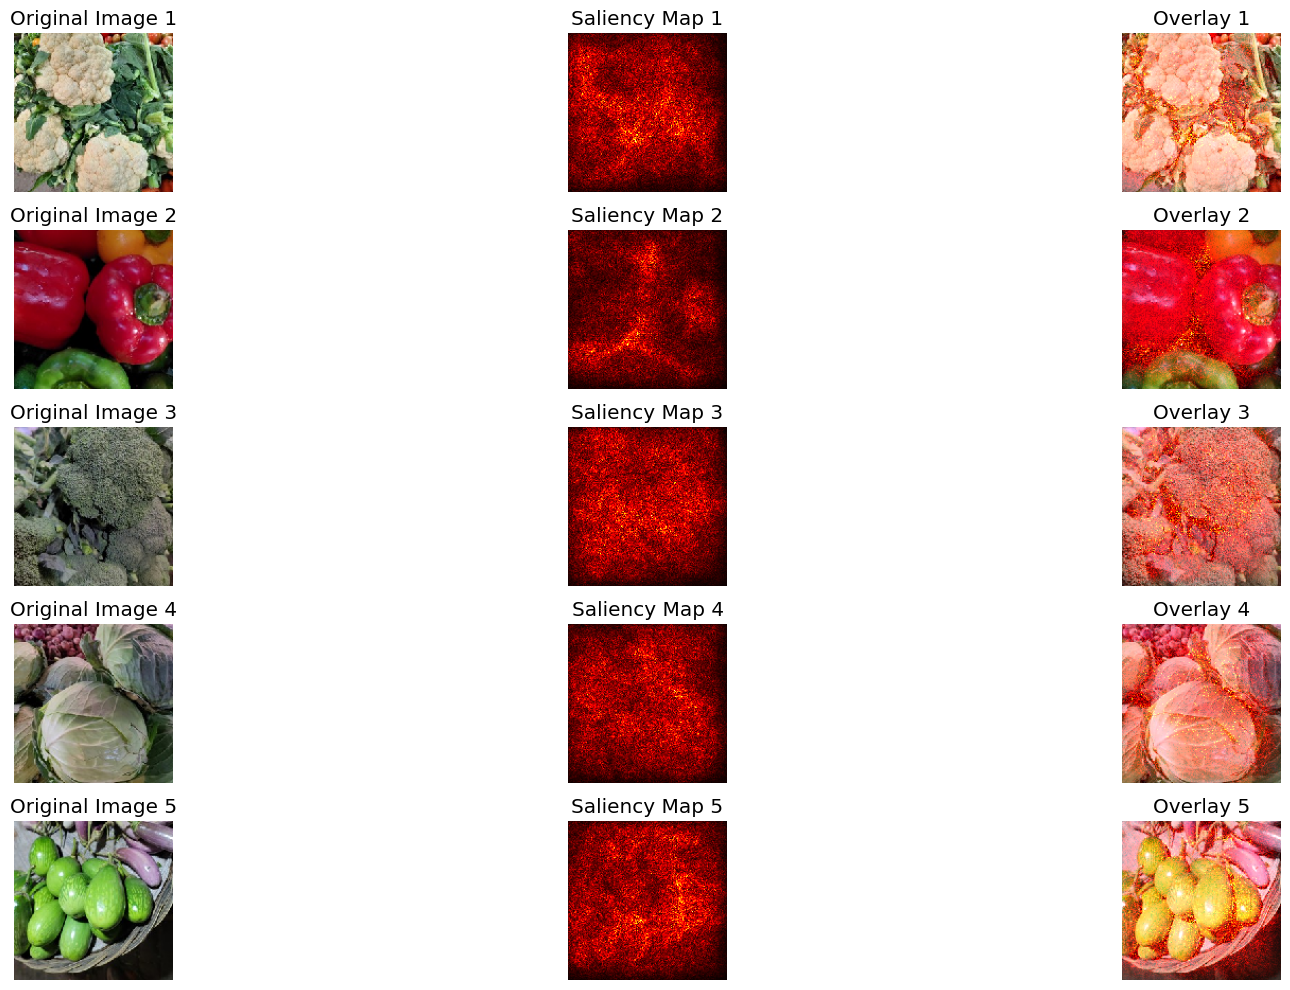

In [196]:
# Saliency Maps : are typically visualized as heatmaps overlaid on the original image. Brighter regions indicate 
# areas of higher importance, while darker regions indicate areas of lower importance. It gives us a idea about 
# where the model lacks and need further improvement. 

# Load the best model
model = tf.keras.models.load_model('C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Save_Model/my_model.keras')

# List of image paths
img_paths = [
    'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train/Cauliflower/0004.jpg',
    'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train/Capsicum/0003.jpg',
    'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train/Broccoli/0008.jpg',
    'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train/Cabbage/0019.jpg',
    'C:/Users/lenovo/Downloads/Vegetable_Classification_And_Detection/Vegetables_Images/train/Brinjal/0011.jpg'
]
# Function to preprocess images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale like in your generator
    return img_array

# Function to compute saliency map
def compute_saliency_map(model, img_array):
    img_array = tf.convert_to_tensor(img_array)  # Convert NumPy array to TensorFlow tensor
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        predictions = model(img_array)
        top_pred_idx = tf.argmax(predictions[0])
        top_class_channel = predictions[:, top_pred_idx]

    # Get the gradient of the loss with respect to the input image
    grads = tape.gradient(top_class_channel, img_array)
    
    # Take the maximum of the gradients along the color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)
    saliency = saliency.numpy()
    
    return saliency

# Function to overlay saliency map on the original image
def overlay_saliency_on_image(img_path, saliency_map):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalize image array

    # Normalize saliency map
    saliency_map = np.interp(saliency_map[0], (saliency_map[0].min(), saliency_map[0].max()), (0, 1))
    
    # Create an overlay
    heatmap = cm.get_cmap('hot')(saliency_map)
    heatmap = heatmap[:, :, :3]  # Remove alpha channel
    overlay = np.clip(img_array + heatmap, 0, 1)
    
    return img_array, overlay

# Function to display images with overlays
def display_images_with_overlays(img_paths, saliency_maps):
    plt.figure(figsize=(20, 10))

    for i, (img_path, saliency_map) in enumerate(zip(img_paths, saliency_maps)):
        img_array, overlay = overlay_saliency_on_image(img_path, saliency_map)
        
        
        # Display original image
        plt.subplot(len(img_paths), 3, 3 * i + 1)
        plt.imshow(img_array)
        plt.axis('off')
        plt.title(f'Original Image {i+1}')
        
        # Display saliency map
        plt.subplot(len(img_paths), 3, 3 * i + 2)
        plt.imshow(saliency_map[0], cmap='hot')
        plt.axis('off')
        plt.title(f'Saliency Map {i+1}')
        
        # Display image with saliency overlay
        plt.subplot(len(img_paths), 3, 3 * i + 3)
        plt.imshow(overlay)
        plt.axis('off')
        plt.title(f'Overlay {i+1}')

    plt.tight_layout()
    plt.show()

# Process and compute saliency maps for all images
saliency_maps = [compute_saliency_map(model, preprocess_image(img_path)) for img_path in img_paths]

# Display images with saliency overlays
display_images_with_overlays(img_paths, saliency_maps)